In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2

In [3]:
#Loading Dataset:
!pip install -q kaggle


In [4]:
#move the zip file to my google drive
#first mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip /content/drive/MyDrive/temp/V2.zip -d dataset/

Archive:  /content/drive/MyDrive/temp/V2.zip
   creating: dataset/V2/
   creating: dataset/V2/Annotations/
  inflating: dataset/V2/Annotations/scene00022.png  
  inflating: dataset/V2/Annotations/scene00023.png  
  inflating: dataset/V2/Annotations/scene00024.png  
  inflating: dataset/V2/Annotations/scene00025.png  
  inflating: dataset/V2/Annotations/scene00026.png  
  inflating: dataset/V2/Annotations/scene00027.png  
  inflating: dataset/V2/Annotations/scene00028.png  
  inflating: dataset/V2/Annotations/scene00029.png  
  inflating: dataset/V2/Annotations/scene00030.png  
  inflating: dataset/V2/Annotations/scene00031.png  
  inflating: dataset/V2/Annotations/scene00032.png  
  inflating: dataset/V2/Annotations/scene00033.png  
  inflating: dataset/V2/Annotations/scene00034.png  
  inflating: dataset/V2/Annotations/scene00035.png  
  inflating: dataset/V2/Annotations/scene00036.png  
  inflating: dataset/V2/Annotations/scene00037.png  
  inflating: dataset/V2/Annotations/scene0003

In [6]:
!unzip /content/drive/MyDrive/temp/V3.zip -d dataset/

Archive:  /content/drive/MyDrive/temp/V3.zip
   creating: dataset/V3/
   creating: dataset/V3/Annotations/
  inflating: dataset/V3/Annotations/scene00001.png  
  inflating: dataset/V3/Annotations/scene00002.png  
  inflating: dataset/V3/Annotations/scene00003.png  
  inflating: dataset/V3/Annotations/scene00004.png  
  inflating: dataset/V3/Annotations/scene00005.png  
  inflating: dataset/V3/Annotations/scene00006.png  
  inflating: dataset/V3/Annotations/scene00007.png  
  inflating: dataset/V3/Annotations/scene00008.png  
  inflating: dataset/V3/Annotations/scene00009.png  
  inflating: dataset/V3/Annotations/scene00010.png  
  inflating: dataset/V3/Annotations/scene00011.png  
  inflating: dataset/V3/Annotations/scene00012.png  
  inflating: dataset/V3/Annotations/scene00013.png  
  inflating: dataset/V3/Annotations/scene00014.png  
  inflating: dataset/V3/Annotations/scene00015.png  
  inflating: dataset/V3/Annotations/scene00016.png  
  inflating: dataset/V3/Annotations/scene0001

Make proper accurate splits of data

In [7]:
#convert all the segmented images into black and white
import cv2
import os
import numpy as np

def convert_annotations(input_folder, output_folder):
    """
    Convert pink annotations to binary (black and white) masks
    """
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process each image in the folder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Read image
            img_path = os.path.join(input_folder, filename)
            img = cv2.imread(img_path)

            # Convert to binary mask
            # Convert to grayscale first
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Threshold to create binary image
            # Assuming pink regions are significantly different from black background
            _, binary = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

            # Save the binary mask
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, binary)

# Usage
input_folder = "/content/dataset/V2/Annotations"
output_folder = "/content/dataset/V2/AnnotationsWB"
convert_annotations(input_folder, output_folder)

In [8]:
# Usage
input_folder = "/content/dataset/V3/Annotations"
output_folder = "/content/dataset/V3/AnnotationsWB"
convert_annotations(input_folder, output_folder)

In [11]:
# import os
# import shutil
# import random

# # Assuming the previous code has already been executed, and the following directories are set up:
IMAGE_PATH = '/content/dataset/V3/Images/'
MASK_PATH = '/content/dataset/V3/AnnotationsWB'

# # Create the test directory if it doesn't exist
# os.makedirs(TEST_PATH, exist_ok=True)

# # Get all image filenames
# all_images = sorted([f for f in os.listdir(IMAGE_PATH) if f.endswith('.jpeg')])

# # Calculate 10% for the test split
# num_test = int(len(all_images) * 0.1)

# # Randomly select 10% of the dataset for testing
# test_indices = random.sample(range(len(all_images)), num_test)

# # Move selected images to the test directory
# for idx in test_indices:
#     src = os.path.join(IMAGE_PATH, all_images[idx])
#     dst = os.path.join(TEST_PATH, all_images[idx])
#     shutil.move(src, dst)

# print(f"Moved {num_test} images to the test directory: {TEST_PATH}")

# # Check the number of files in the test directory
# print("Number of files in the test directory: " + str(len(os.listdir(TEST_PATH))))

In [12]:
# Create the test_masks directory if it doesn't exist
TEST_MASKS_PATH = '/content/dataset/V2/AnnotationsWB'
TEST_PATH = '/content/dataset/V2/Images'
os.makedirs(TEST_MASKS_PATH, exist_ok=True)

# Move corresponding masks to the test_masks directory
# for idx in test_indices:
#     # Get the filename of the image that was moved
#     image_filename = all_images[idx]

#     # The mask filename is the same as the image filename
#     mask_filename = image_filename  # No changes needed to the filename
#     mask_filename = os.path.splitext(image_filename)[0] + ".png"
#     src_mask = os.path.join(MASK_PATH, mask_filename)

#     # Print debug information
#     print(f"Checking for mask: {mask_filename}")
#     print(f"Source mask path: {src_mask}")

#     # Check if the corresponding mask exists before moving
#     if os.path.exists(src_mask):
#         dst_mask = os.path.join(TEST_MASKS_PATH, mask_filename)
#         shutil.move(src_mask, dst_mask)
#     else:
#         print(f"Mask not found for image: {image_filename}")

# Check the number of files in the test_masks directory
print("Number of masks in the test_masks directory: " + str(len(os.listdir(TEST_MASKS_PATH))))

Number of masks in the test_masks directory: 128


In [13]:
print("Number of files in the mask directory: " + str(len(os.listdir(MASK_PATH))))
print("Number of files in the train_image directory: " + str(len(os.listdir(IMAGE_PATH))))

Number of files in the mask directory: 127
Number of files in the train_image directory: 127


In [14]:
print("Number of files in the test_mask directory: " + str(len(os.listdir(TEST_PATH))))
print("Number of files in the test_image directory: " + str(len(os.listdir(TEST_MASKS_PATH))))

Number of files in the test_mask directory: 128
Number of files in the test_image directory: 128


In [15]:
import os
from PIL import Image

# Define paths
jpeg_folder = "/content/dataset/V2/Images/"  # Replace with your folder containing .jpeg files
png_folder = "/content/dataset/V2/Imagespng"   # Replace with your desired output folder for .png files

# Create output folder if it doesn't exist
os.makedirs(png_folder, exist_ok=True)

# Loop through all files in the .jpeg folder
for file_name in os.listdir(jpeg_folder):
    if file_name.endswith(".jpeg") or file_name.endswith(".jpg"):
        # Open the .jpeg file
        jpeg_path = os.path.join(jpeg_folder, file_name)
        image = Image.open(jpeg_path)

        # Save as .png
        png_path = os.path.join(png_folder, file_name.rsplit(".", 1)[0] + ".png")
        image.save(png_path, format="PNG", optimize=True)  # Save without losing data
        print(f"Converted: {jpeg_path} -> {png_path}")

print("All files converted successfully.")

Converted: /content/dataset/V2/Images/scene00113.jpeg -> /content/dataset/V2/Imagespng/scene00113.png
Converted: /content/dataset/V2/Images/scene00066.jpeg -> /content/dataset/V2/Imagespng/scene00066.png
Converted: /content/dataset/V2/Images/scene00056.jpeg -> /content/dataset/V2/Imagespng/scene00056.png
Converted: /content/dataset/V2/Images/scene00094.jpeg -> /content/dataset/V2/Imagespng/scene00094.png
Converted: /content/dataset/V2/Images/scene00072.jpeg -> /content/dataset/V2/Imagespng/scene00072.png
Converted: /content/dataset/V2/Images/scene00149.jpeg -> /content/dataset/V2/Imagespng/scene00149.png
Converted: /content/dataset/V2/Images/scene00107.jpeg -> /content/dataset/V2/Imagespng/scene00107.png
Converted: /content/dataset/V2/Images/scene00076.jpeg -> /content/dataset/V2/Imagespng/scene00076.png
Converted: /content/dataset/V2/Images/scene00140.jpeg -> /content/dataset/V2/Imagespng/scene00140.png
Converted: /content/dataset/V2/Images/scene00121.jpeg -> /content/dataset/V2/Image

In [16]:
import os
from PIL import Image

# Define paths
jpeg_folder = "/content/dataset/V3/Images/"  # Replace with your folder containing .jpeg files
png_folder = "/content/dataset/V3/Imagespng"   # Replace with your desired output folder for .png files

# Create output folder if it doesn't exist
os.makedirs(png_folder, exist_ok=True)

# Loop through all files in the .jpeg folder
for file_name in os.listdir(jpeg_folder):
    if file_name.endswith(".jpeg") or file_name.endswith(".jpg"):
        # Open the .jpeg file
        jpeg_path = os.path.join(jpeg_folder, file_name)
        image = Image.open(jpeg_path)

        # Save as .png
        png_path = os.path.join(png_folder, file_name.rsplit(".", 1)[0] + ".png")
        image.save(png_path, format="PNG", optimize=True)  # Save without losing data
        print(f"Converted: {jpeg_path} -> {png_path}")

print("All files converted successfully.")

Converted: /content/dataset/V3/Images/scene00113.jpeg -> /content/dataset/V3/Imagespng/scene00113.png
Converted: /content/dataset/V3/Images/scene00066.jpeg -> /content/dataset/V3/Imagespng/scene00066.png
Converted: /content/dataset/V3/Images/scene00056.jpeg -> /content/dataset/V3/Imagespng/scene00056.png
Converted: /content/dataset/V3/Images/scene00094.jpeg -> /content/dataset/V3/Imagespng/scene00094.png
Converted: /content/dataset/V3/Images/scene00072.jpeg -> /content/dataset/V3/Imagespng/scene00072.png
Converted: /content/dataset/V3/Images/scene00007.jpeg -> /content/dataset/V3/Imagespng/scene00007.png
Converted: /content/dataset/V3/Images/scene00107.jpeg -> /content/dataset/V3/Imagespng/scene00107.png
Converted: /content/dataset/V3/Images/scene00076.jpeg -> /content/dataset/V3/Imagespng/scene00076.png
Converted: /content/dataset/V3/Images/scene00121.jpeg -> /content/dataset/V3/Imagespng/scene00121.png
Converted: /content/dataset/V3/Images/scene00017.jpeg -> /content/dataset/V3/Image

Implementation with Pywavelets

Testing Wavelet Transformations

In [17]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 51.6 MB/s eta 0:00:00


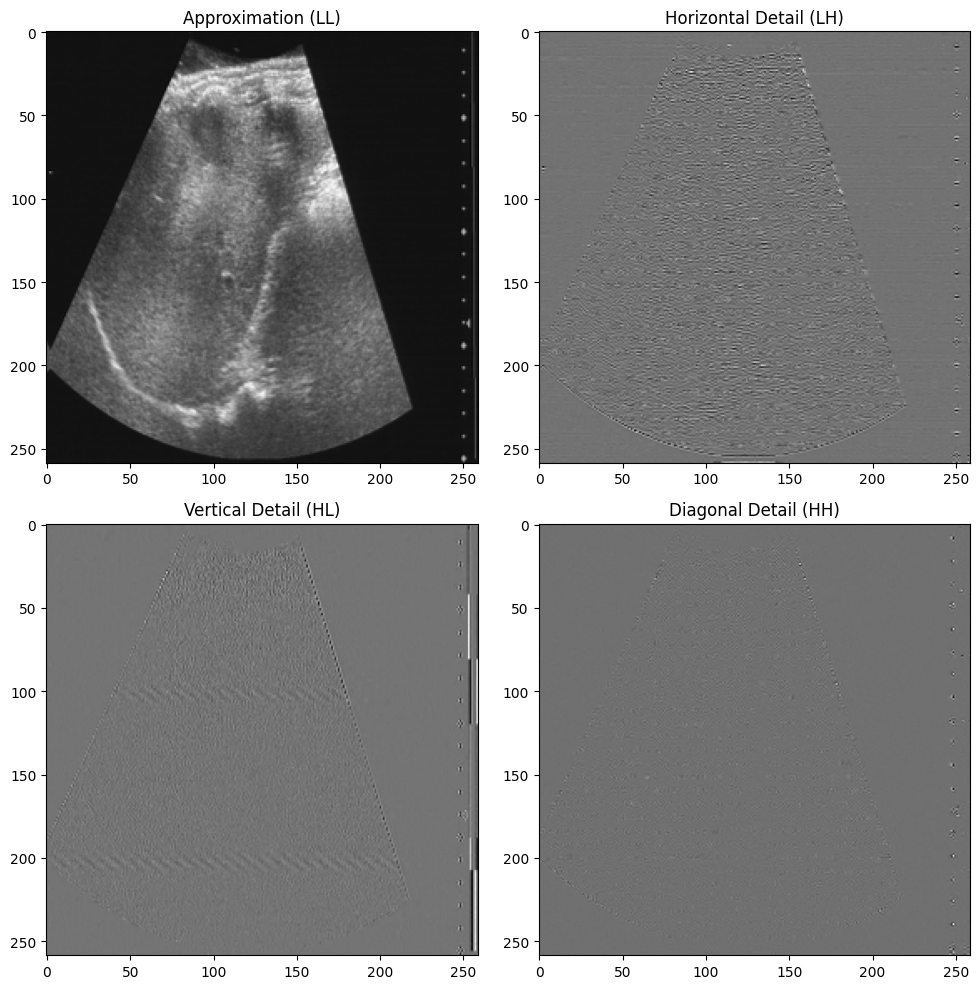

In [18]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Function to load and preprocess image
def load_image(image_path):
    # Load the image in grayscale mode
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    img = cv2.resize(img, (512,512))

    # Normalize the image data (optional but helps with numerical stability)
    img = img / 255.0

    return img

# Function to perform 2D wavelet transform and plot components
def perform_wavelet_transform(image):
    # Perform 2D Discrete Wavelet Transform using the Daubechies 4 (db4) wavelet
    coeffs2 = pywt.dwt2(image, 'db4')

    # The result of dwt2 is a tuple containing (LL, (LH, HL, HH))
    LL, (LH, HL, HH) = coeffs2

    # Plot the original and transformed coefficients
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(LL, cmap='gray')
    plt.title('Approximation (LL)')

    plt.subplot(2, 2, 2)
    plt.imshow(LH, cmap='gray')
    plt.title('Horizontal Detail (LH)')

    plt.subplot(2, 2, 3)
    plt.imshow(HL, cmap='gray')
    plt.title('Vertical Detail (HL)')

    plt.subplot(2, 2, 4)
    plt.imshow(HH, cmap='gray')
    plt.title('Diagonal Detail (HH)')

    plt.tight_layout()
    plt.show()

image_path = '/content/dataset/V2/Imagespng/scene00023.png'

image = load_image(image_path)

perform_wavelet_transform(image)

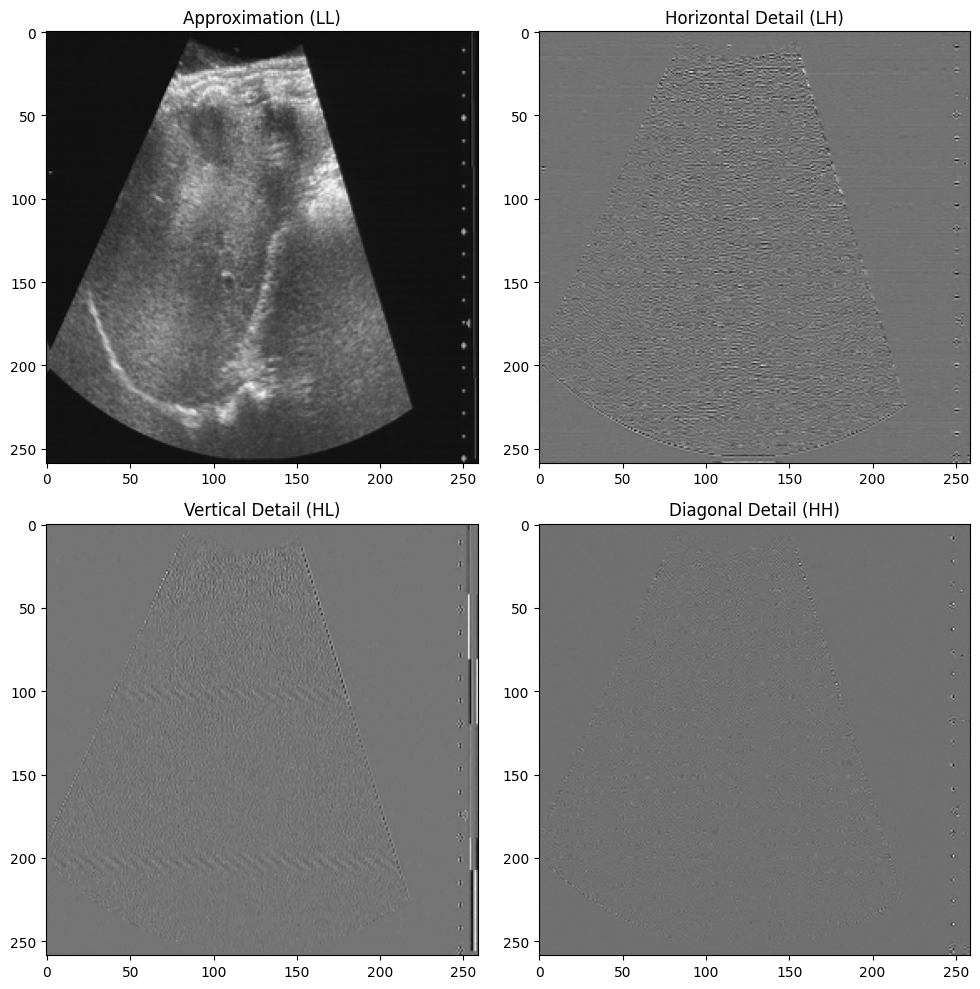

In [19]:
# Test images in our dataset
image_path = '/content/dataset/V2/Images/scene00023.jpeg'

image = load_image(image_path)
perform_wavelet_transform(image)

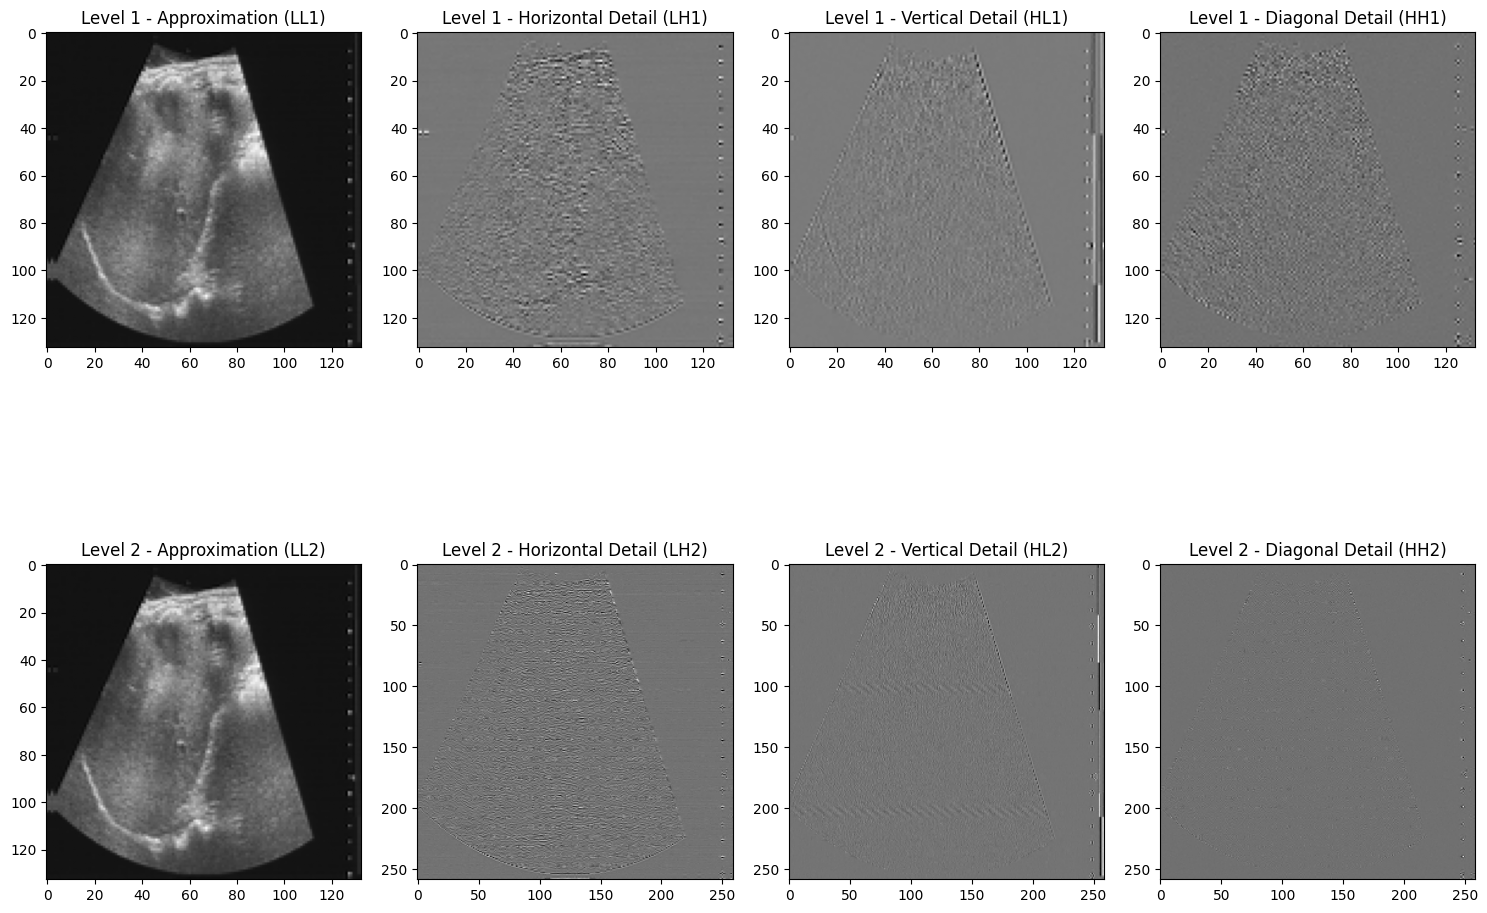

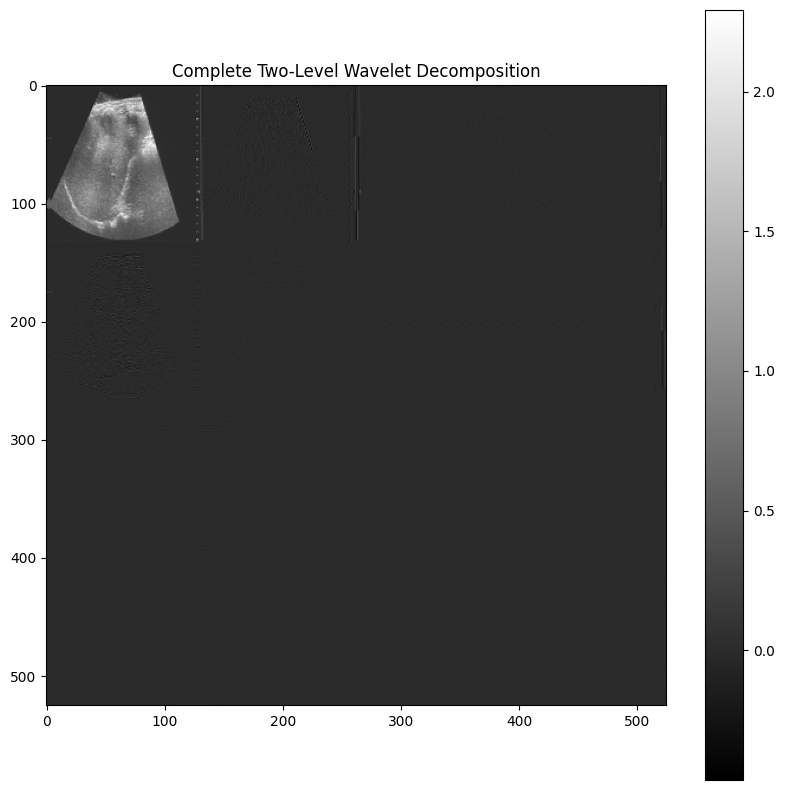

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt

def load_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512,512))
    img = img / 255.0
    return img

def two_level_wavelet_transform(image):
    # Perform two-level decomposition using pywt
    coeffs = pywt.wavedec2(image, 'db4', level=2)

    # First level
    LL1 = coeffs[0]
    (LH1, HL1, HH1) = coeffs[1]

    # Second level
    LL2 = coeffs[0]
    (LH2, HL2, HH2) = coeffs[2]

    return (LL1, LH1, HL1, HH1), (LL2, LH2, HL2, HH2)

def display_two_level_wavelet_transform(image):
    # Get coefficients
    (LL1, LH1, HL1, HH1), (LL2, LH2, HL2, HH2) = two_level_wavelet_transform(image)

    # Create visualization plots
    plt.figure(figsize=(15, 12))

    # First Level
    plt.subplot(2, 4, 1)
    plt.imshow(LL1, cmap='gray')
    plt.title('Level 1 - Approximation (LL1)')

    plt.subplot(2, 4, 2)
    plt.imshow(LH1, cmap='gray')
    plt.title('Level 1 - Horizontal Detail (LH1)')

    plt.subplot(2, 4, 3)
    plt.imshow(HL1, cmap='gray')
    plt.title('Level 1 - Vertical Detail (HL1)')

    plt.subplot(2, 4, 4)
    plt.imshow(HH1, cmap='gray')
    plt.title('Level 1 - Diagonal Detail (HH1)')

    # Second Level
    plt.subplot(2, 4, 5)
    plt.imshow(LL2, cmap='gray')
    plt.title('Level 2 - Approximation (LL2)')

    plt.subplot(2, 4, 6)
    plt.imshow(LH2, cmap='gray')
    plt.title('Level 2 - Horizontal Detail (LH2)')

    plt.subplot(2, 4, 7)
    plt.imshow(HL2, cmap='gray')
    plt.title('Level 2 - Vertical Detail (HL2)')

    plt.subplot(2, 4, 8)
    plt.imshow(HH2, cmap='gray')
    plt.title('Level 2 - Diagonal Detail (HH2)')

    plt.tight_layout()
    plt.show()

    # Complete decomposition visualization
    coeffs_arr = pywt.coeffs_to_array(pywt.wavedec2(image, 'db4', level=2))[0]
    plt.figure(figsize=(10, 10))
    plt.imshow(coeffs_arr, cmap='gray')
    plt.title('Complete Two-Level Wavelet Decomposition')
    plt.colorbar()
    plt.show()

# Usage
image_path = '/content/dataset/V2/Imagespng/scene00023.png'
image = load_image(image_path)
display_two_level_wavelet_transform(image)

INterRouted Method:

In [21]:
import numpy as np
import cv2
from tensorflow.keras.utils import Sequence
import os
import pywt


class WaveletDataGenerator(Sequence):
    def __init__(self, image_folder, mask_folder, file_list, batch_size=32,
                 input_size=(128,128), shuffle=True):
        self.image_folder = image_folder
        self.mask_folder = mask_folder
        self.file_list = file_list
        self.batch_size = batch_size
        self.input_size = input_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.file_list))
        self.n_channels = 7

    def __len__(self):
        return int(np.ceil(len(self.file_list) / self.batch_size))

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __getitem__(self, idx):
        # Get batch indexes
        indexes = self.indexes[idx*self.batch_size:(idx+1)*self.batch_size]
        batch_files = [self.file_list[i] for i in indexes]

        # Initialize batch arrays
        X = np.zeros((len(batch_files), *self.input_size, 7))
        y = np.zeros((len(batch_files), *self.input_size, 1))

        # Process each file in batch
        for i, filename in enumerate(batch_files):
            # Load and process image
            img_path = os.path.join(self.image_folder, filename)
            mask_path = os.path.join(self.mask_folder, filename)

            # Load image and mask
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

            if image is None or mask is None:
                raise ValueError(f"Error loading {filename}")

            # Resize to input size
            image = cv2.resize(image, self.input_size)
            mask = cv2.resize(mask, self.input_size)

            # Normalize
            image = image / 255.0
            mask = (mask > 127).astype(np.float32)

            # Get wavelet components
            try:
                processed_components = self._process_wavelet_components(image)
                X[i] = processed_components
                y[i] = np.expand_dims(mask, axis=-1)
            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")
                continue

        return X, y

    def _process_wavelet_components(self, image):
        """Process wavelet components for model input."""
        # Perform 2-level decomposition
        coeffs = pywt.wavedec2(image, 'db4', level=2)

        # Extract components
        LL1 = coeffs[0]
        (LH1, HL1, HH1) = coeffs[1]  # First level details
        LL2 = coeffs[0]
        (LH2, HL2, HH2) = coeffs[2]  # Second level details

        # Resize and normalize components in new order
        components = [
            cv2.resize(self._normalize_component(LH1), self.input_size),
            cv2.resize(self._normalize_component(HL1), self.input_size),
            cv2.resize(self._normalize_component(HH1), self.input_size),
            cv2.resize(self._normalize_component(LL2), self.input_size),
            cv2.resize(self._normalize_component(LH2), self.input_size),
            cv2.resize(self._normalize_component(HL2), self.input_size),
            cv2.resize(self._normalize_component(HH2), self.input_size)
        ]

        return np.stack(components, axis=-1)

    def _normalize_component(self, component):
        """Normalize wavelet component to [0,1] range"""
        min_val = np.min(component)
        max_val = np.max(component)
        if max_val - min_val > 0:
            return (component - min_val) / (max_val - min_val)
        return component

**Light Weight UNet Model**

In [22]:
!pip install keras_unet_collection

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 3.3 MB/s eta 0:00:00


In [23]:
from keras_unet_collection import models

In [24]:
from keras_unet_collection import models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os

# Define paths
IMAGE_PATH = "/content/dataset/V2/Imagespng"
MASK_PATH = "/content/dataset/V2/AnnotationsWB"

# Model Definition
def build_lightweight_unet():
    """
    Builds a lightweight U-Net model using keras_unet_collection's unet_2d function.
    """
    model = models.unet_2d(
        input_size=(128, 128, 7),  # Specify input size here
        filter_num=[2,4,8,16,32],  # Lightweight configuration
        n_labels=1,
        stack_num_down=2,
        stack_num_up=1,
        activation='ReLU',  # Use ReLU for consistency with the old model
        output_activation='Sigmoid',  # Use Sigmoid for binary segmentation
        batch_norm=True,
        pool='max',
        unpool='nearest',
        name='lightweight_unet'
    )
    return model

# Build the model
model = build_lightweight_unet()

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

def dice_loss(y_true, y_pred):
    smooth = 1e-6
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3])
    dice = (2. * intersection + smooth) / (union + smooth)
    return 1 - dice

def combined_loss(y_true, y_pred):
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    return dice_loss(y_true, y_pred) + bce

model.compile(
    optimizer=optimizer,
    loss=combined_loss,
    metrics=[dice_loss, 'accuracy']
)

In [25]:
# Print the model summary to confirm the architecture
model.summary()
batch_size=4

Model: "lightweight_unet_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 7)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0  │ (None, 128, 128, 2)    │            126 │ input_layer[0][0]      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0… │ (None, 128, 128, 2)    │              8 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_0… │ (None, 128, 128, 2)    │              0 │ lightweight_unet_down… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1  │ (None, 128, 128, 2)    │             36 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1… │ (None, 128, 128, 2)    │              8 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down0_1… │ (None, 128, 128, 2)    │              0 │ lightweight_unet_down… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_e… │ (None, 64, 64, 2)      │              0 │ lightweight_unet_down… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │             72 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │             16 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │              0 │ lightweight_unet_down… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │            144 │ lightweight_unet_down… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down1_c… │ (None, 64, 64, 4)      │             16 │ lightweight_unet_down… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lightweight_unet_down

 Total params: 31,501 (123.05 KB)

 Trainable params: 31,133 (121.61 KB)

 Non-trainable params: 368 (1.44 KB)

In [26]:
# from tensorflow.keras import backend as K

# def dice_loss(y_true, y_pred):
#     smooth = 1e-6
#     intersection = K.sum(y_true * y_pred)
#     return 1 - (2. * intersection + smooth) / (K.sum(y_true) + K.sum(y_pred) + smooth)

# model.compile(optimizer=optimizer, loss=dice_loss, metrics=['accuracy'])

In [27]:
def dice_coefficient(y_true, y_pred):
    smooth = 1e-6
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1,2,3])
    union = tf.reduce_sum(y_true, axis=[1,2,3]) + tf.reduce_sum(y_pred, axis=[1,2,3])
    return tf.reduce_mean((2. * intersection + smooth) / (union + smooth))

def combined_loss(y_true, y_pred):
    dice = 1 - dice_coefficient(y_true, y_pred)
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    return dice + bce

# Modify model compilation
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=combined_loss,
    metrics=[dice_coefficient, 'accuracy']
)

BIfocal Loss

In [28]:
import tensorflow as tf

def binary_focal_loss(gamma=2.0, alpha=0.25):
    """
    Binary focal loss with additional parameters for fine-tuning
    gamma: focusing parameter for hard examples
    alpha: class weight parameter
    """
    def focal_loss(y_true, y_pred):
        # Cast inputs to float32 for consistency with wavelet processing
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)

        # Calculate focal loss
        loss = -y_true * alpha * tf.pow(1 - y_pred, gamma) * tf.math.log(y_pred) - \
               (1 - y_true) * (1 - alpha) * tf.pow(y_pred, gamma) * tf.math.log(1 - y_pred)
        return tf.reduce_mean(loss)
    return focal_loss

# Model compilation with focal loss
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=binary_focal_loss(gamma=2.0, alpha=0.25),
    metrics=['accuracy',
             tf.keras.metrics.BinaryIoU(threshold=0.5),
             tf.keras.metrics.Recall(),
             tf.keras.metrics.Precision()]
)

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

IMAGE_PATH="/content/dataset/V3/Imagespng"
MASK_PATH="/content/dataset/V3/AnnotationsWB"

# Split data
image_files = os.listdir(IMAGE_PATH)
train_files, val_files = train_test_split(image_files, test_size=0.1, random_state=42)

train_data_gen = WaveletDataGenerator(
    image_folder=IMAGE_PATH,
    mask_folder=MASK_PATH,
    file_list=train_files,
    batch_size=batch_size
)

val_data_gen = WaveletDataGenerator(
    image_folder=IMAGE_PATH,
    mask_folder=MASK_PATH,
    file_list=val_files,
    batch_size=batch_size
)

In [31]:
# Extract a single batch from the train_data_gen
sample_images, sample_masks = train_data_gen[0]  # First batch

# Get the shape of a single image and mask from the batch
image_shape = sample_images[0].shape  # Shape of one image in the batch
mask_shape = sample_masks[0].shape   # Shape of one mask in the batch

print(f"Image shape: {image_shape}")
print(f"Mask shape: {mask_shape}")

Image shape: (128, 128, 7)
Mask shape: (128, 128, 1)


In [32]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True)

history = model.fit(
    train_data_gen,
    validation_data=val_data_gen,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

model.save("LightWeightPyWaveletUNetLiverTwoLevelDecomp.h5")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 611ms/step - accuracy: 0.6572 - binary_io_u: 0.4391 - loss: 0.1145 - precision: 0.3515 - recall: 0.8812 - val_accuracy: 0.8130 - val_binary_io_u: 0.4065 - val_loss: 0.0997 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.8765 - binary_io_u: 0.7214 - loss: 0.0840 - precision: 0.6172 - recall: 0.9390 - val_accuracy: 0.8131 - val_binary_io_u: 0.4065 - val_loss: 0.0822 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9180 - binary_io_u: 0.7956 - loss: 0.0720 - precision: 0.7274 - recall: 0.9322 - val_accuracy: 0.8468 - val_binary_io_u: 0.5157 - val_loss: 0.0679 - val_precision: 0.9177 - val_recall: 0.1936 - learning_rate: 0.0010
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9600 - binary_io_u: 0.8849 - loss: 0.0621 - precision: 0.8640 - recall: 0.9398 - val

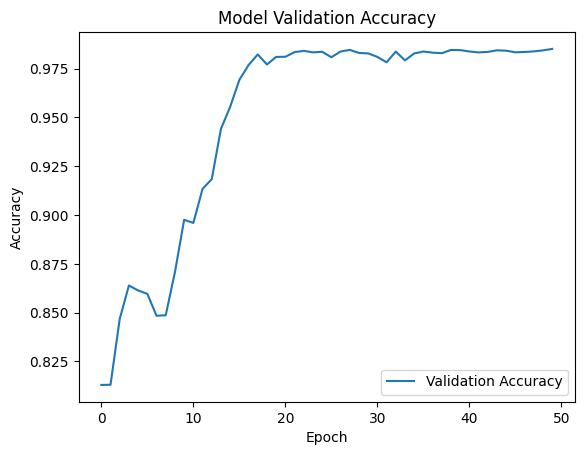

In [33]:
# Train the model for
# Plotting training accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Original image shape: (128, 128)
Preprocessed image shape: (128, 128, 7)
Ground truth mask shape: (128, 128)
Model input shape: (1, 128, 128, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


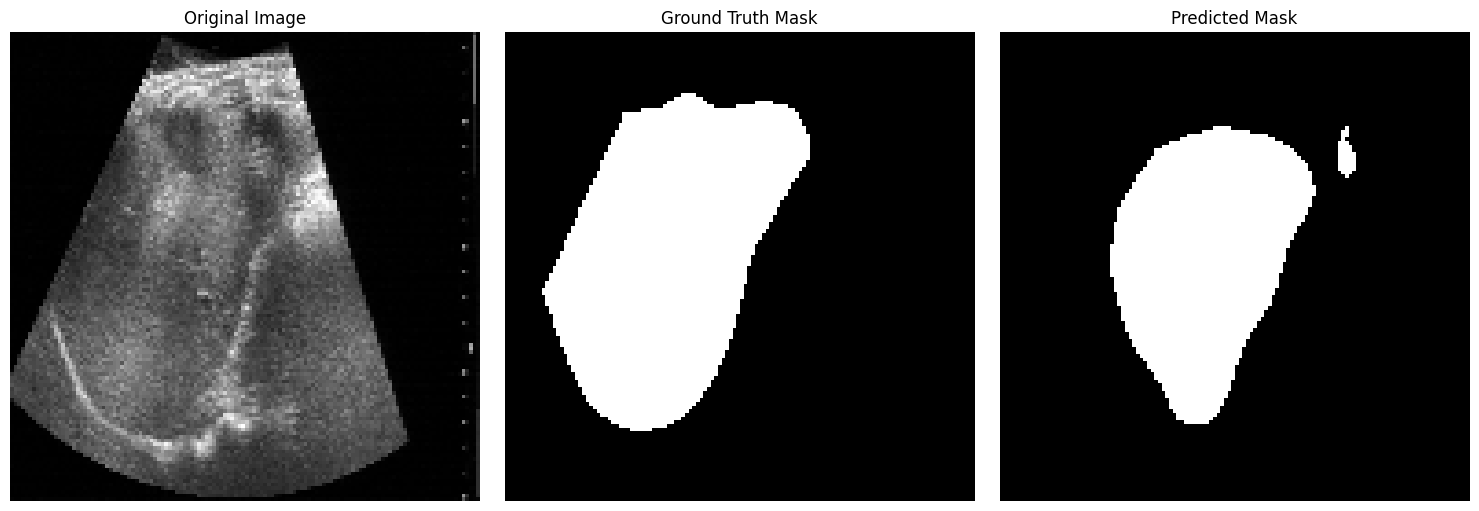

Accuracy: 0.8486
F1 Score: 0.6560


In [34]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
import pywt

def load_and_preprocess_image(image_path, image_size=(128,128)):
    if not os.path.exists(image_path):
        raise ValueError(f"Image not found: {image_path}")

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image could not be loaded: {image_path}")

    img_resized = cv2.resize(img, image_size) / 255.0

    # Perform 2-level wavelet decomposition
    coeffs = pywt.wavedec2(img_resized, 'db4', level=2)

    # Extract components
    LL1 = coeffs[0]
    (LH1, HL1, HH1) = coeffs[1]  # First level details
    LL2 = coeffs[0]
    (LH2, HL2, HH2) = coeffs[2]  # Second level details

    # Normalize and resize components
    components = [
        cv2.resize(normalize_component(LH1), image_size),
        cv2.resize(normalize_component(HL1), image_size),
        cv2.resize(normalize_component(HH1), image_size),
        cv2.resize(normalize_component(LL2), image_size),
        cv2.resize(normalize_component(LH2), image_size),
        cv2.resize(normalize_component(HL2), image_size),
        cv2.resize(normalize_component(HH2), image_size)
    ]

    # Stack for model input
    wavelet_image = np.stack(components, axis=-1)
    return img_resized, wavelet_image

def normalize_component(component):
    min_val = np.min(component)
    max_val = np.max(component)
    if max_val - min_val > 0:
        return (component - min_val) / (max_val - min_val)
    return component

def load_ground_truth_mask(mask_path, image_size=(128, 128)):
    if not os.path.exists(mask_path):
        raise ValueError(f"Ground truth mask not found: {mask_path}")

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        raise ValueError(f"Ground truth mask could not be loaded: {mask_path}")

    mask_resized = cv2.resize(mask, image_size)
    mask_binary = (mask_resized > 127).astype(np.uint8)
    return mask_binary

# Testing code
image_path = "/content/dataset/V3/Imagespng/scene00022.png"
mask_path = "/content/dataset/V3/AnnotationsWB/scene00022.png"

# Load and preprocess
original_image, preprocessed_image = load_and_preprocess_image(image_path)
ground_truth_mask = load_ground_truth_mask(mask_path)

# Debug prints
print(f"Original image shape: {original_image.shape}")
print(f"Preprocessed image shape: {preprocessed_image.shape}")  # Should be (128, 128, 7)
print(f"Ground truth mask shape: {ground_truth_mask.shape}")

# Prepare for prediction
preprocessed_image_batch = np.expand_dims(preprocessed_image, axis=0)
print(f"Model input shape: {preprocessed_image_batch.shape}")  # Should be (1, 128, 128, 7)

# Make prediction
predicted_mask = model.predict(preprocessed_image_batch)
predicted_mask_binary = (predicted_mask > 0.5).astype(np.uint8)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(ground_truth_mask, cmap='gray')
axes[1].set_title('Ground Truth Mask')
axes[1].axis('off')

axes[2].imshow(predicted_mask_binary[0, :, :, 0], cmap='gray')
axes[2].set_title('Predicted Mask')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Calculate and print metrics
predicted_flat = predicted_mask_binary[0, :, :, 0].flatten()
ground_truth_flat = ground_truth_mask.flatten()

accuracy = accuracy_score(ground_truth_flat, predicted_flat)
f1 = f1_score(ground_truth_flat, predicted_flat)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Preprocessed image shape: (1, 128, 128, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


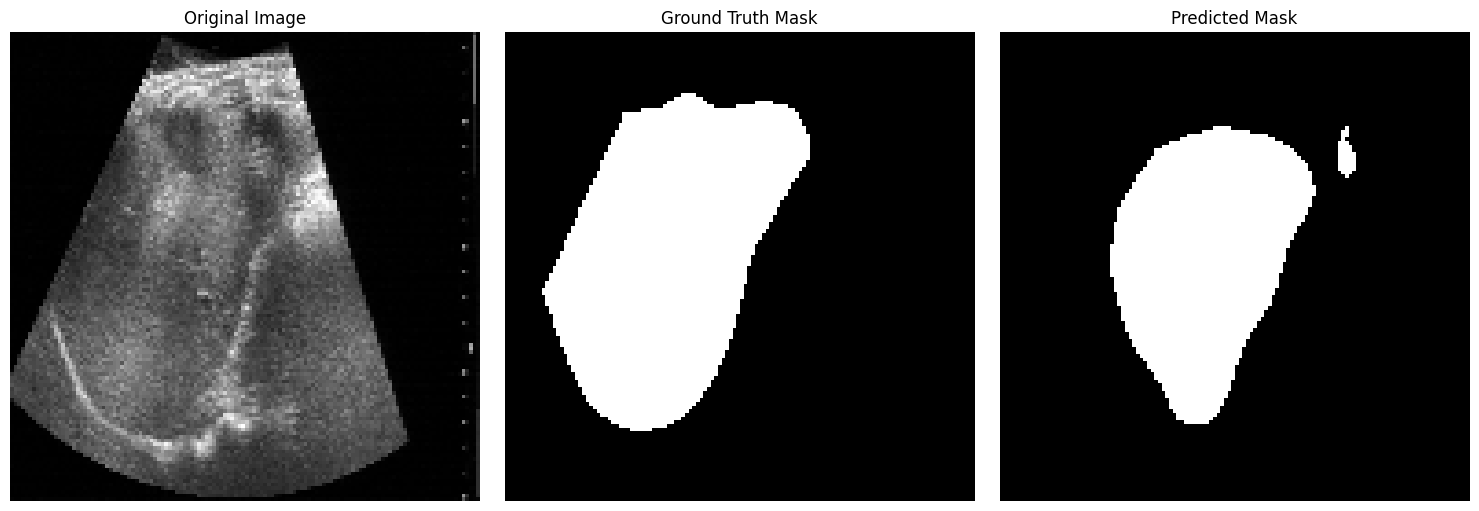

Accuracy: 0.8486
F1 Score: 0.6560


In [35]:
# Load and preprocess ona test image, instead of a training image

image_path = "/content/dataset/V2/Imagespng/scene00022.png"  # Replace with your actual image path
mask_path = "/content/dataset/V2/AnnotationsWB/scene00022.png" # Replace with your actual mask path


original_image, preprocessed_image = load_and_preprocess_image(image_path)
ground_truth_mask = load_ground_truth_mask(mask_path)

# Add a batch dimension for model prediction
preprocessed_image_batch = np.expand_dims(preprocessed_image, axis=0)

print(f"Preprocessed image shape: {preprocessed_image_batch.shape}")

# Make prediction
predicted_mask = model.predict(preprocessed_image_batch)

# Ensure the predicted mask is binary
predicted_mask_binary = (predicted_mask > 0.5).astype(np.uint8)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(ground_truth_mask, cmap='gray')
axes[1].set_title('Ground Truth Mask')
axes[1].axis('off')

axes[2].imshow(predicted_mask_binary[0, :, :, 0], cmap='gray')
axes[2].set_title('Predicted Mask')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Calculate and print metrics
predicted_flat = predicted_mask_binary[0, :, :, 0].flatten()
ground_truth_flat = ground_truth_mask.flatten()

accuracy = accuracy_score(ground_truth_flat, predicted_flat)
f1 = f1_score(ground_truth_flat, predicted_flat)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Model Metrics

In [37]:
import os
import numpy as np
import cv2
import pywt
from sklearn.metrics import jaccard_score, f1_score

class TestWaveletDataGenerator:
    def __init__(self, image_folder, mask_folder, image_size=(128,128)):
        self.image_paths = sorted([os.path.join(image_folder, f) for f in os.listdir(image_folder)])
        self.mask_paths = sorted([os.path.join(mask_folder, f) for f in os.listdir(mask_folder)])
        self.image_size = image_size
        self.n_channels = 7

    def __len__(self):
        return len(self.image_paths)

    def _normalize_component(self, component):
        min_val = np.min(component)
        max_val = np.max(component)
        if max_val - min_val > 0:
            return (component - min_val) / (max_val - min_val)
        return component

    def wavelet_transform(self, image):
        # Perform 2-level decomposition
        coeffs = pywt.wavedec2(image, 'db4', level=2)

        # Extract components
        LL1 = coeffs[0]
        (LH1, HL1, HH1) = coeffs[1]  # First level details
        LL2 = coeffs[0]
        (LH2, HL2, HH2) = coeffs[2]  # Second level details

        # Resize and normalize components
        components = [
            cv2.resize(self._normalize_component(LH1), self.image_size),
            cv2.resize(self._normalize_component(HL1), self.image_size),
            cv2.resize(self._normalize_component(HH1), self.image_size),
            cv2.resize(self._normalize_component(LL2), self.image_size),
            cv2.resize(self._normalize_component(LH2), self.image_size),
            cv2.resize(self._normalize_component(HL2), self.image_size),
            cv2.resize(self._normalize_component(HH2), self.image_size)
        ]

        return np.stack(components, axis=-1)

    def __getitem__(self, index):
        # Load image
        img_path = self.image_paths[index]
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, self.image_size)
        img = img.astype(np.float32) / 255.0

        # Load mask
        mask_path = self.mask_paths[index]
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, self.image_size)
        mask = (mask > 127).astype(np.float32)
        mask = np.expand_dims(mask, axis=-1)

        # Apply wavelet transform
        wavelet_image = self.wavelet_transform(img)

        return np.expand_dims(wavelet_image, axis=0), np.expand_dims(mask, axis=0)

# Usage example
TEST_IMAGE_PATH = "/content/dataset/V2/Imagespng"
TEST_MASK_PATH = "/content/dataset/V2/AnnotationsWB"

test_data_gen = TestWaveletDataGenerator(TEST_IMAGE_PATH, TEST_MASK_PATH)

In [38]:
def compute_metrics(model, data_gen, batch_size=8):
    iou_scores = []
    dice_scores = []

    for i in range(len(data_gen)):
        print(f"Processing image {i+1}/{len(data_gen)}")

        image, mask = data_gen[i]
        pred = model.predict(image)
        pred = (pred > 0.5).astype(np.uint8)
        mask = (mask > 0.5).astype(np.uint8)

        iou = jaccard_score(mask.flatten(), pred.flatten())
        dice = f1_score(mask.flatten(), pred.flatten())

        iou_scores.append(iou)
        dice_scores.append(dice)

    return np.mean(iou_scores), np.mean(dice_scores)


test_data_gen = TestWaveletDataGenerator(TEST_IMAGE_PATH, TEST_MASK_PATH)
iou, dice = compute_metrics(model, test_data_gen)

print("Test IoU:", iou)
print("Test Dice Coefficient:", dice)

Processing image 1/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 2/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Processing image 3/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing image 4/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing image 5/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 6/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 7/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 8/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 9/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 10/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 11/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 12/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Processing image 13/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 14/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Processing image 15/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Processing image 16/128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Processing image 